In [4]:
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib.legend_handler import HandlerTuple
import random as rd
import functools
data = pd.read_csv('padelWorldCupDicc.csv')

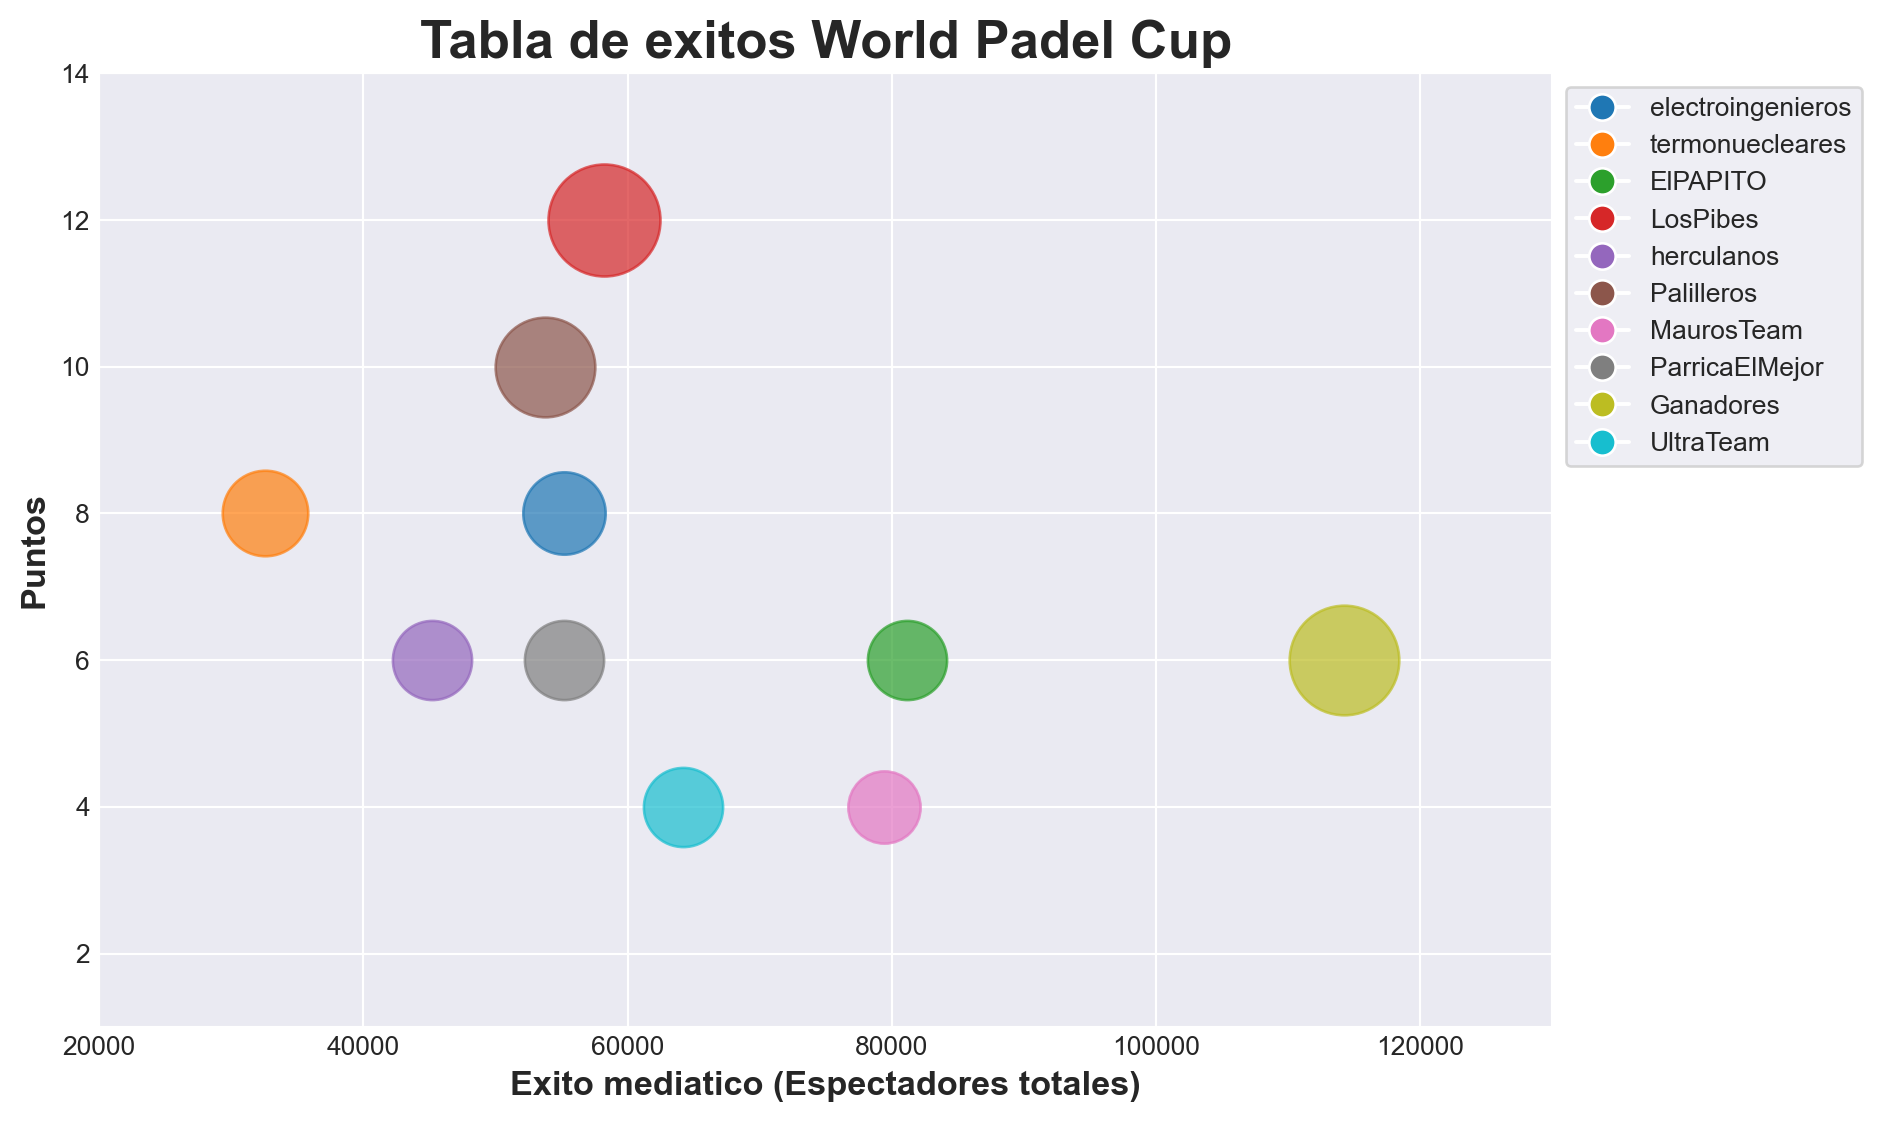

In [131]:

# Definir colores únicos para cada equipo
colores = plt.cm.tab10(range(len(data))) 

# Calcular el tamaño de los puntos según el dinero generado (aumentado para exagerar)
tamaño_puntos = data['dineroGenerado']*1.8 / data['dineroGenerado'].max() * 1000

# Crear el gráfico de dispersión (scatter plot)
plt.figure(figsize=(10, 6),dpi=190)
legend_handles = []

exito_mediatico = list(data['entradasVendidasPorEquipo'])

for i in range(len(exito_mediatico)):
    exito_mediatico[i] *= 2 + data['mediaEspectadoresPorEquipo'][i]

    
for i in range(len(data)):
    plt.scatter(exito_mediatico[i], data['puntos'][i], s=tamaño_puntos[i], color=colores[i], alpha=0.7)
    legend_handles.append(plt.Line2D([0], [0], marker='o', color='w', markersize=10, markerfacecolor=colores[i], label=data['nombreEq'][i]))

# Añadir leyenda personalizada
plt.legend(handles=legend_handles, loc='upper left', bbox_to_anchor=(1, 1), handler_map={tuple: HandlerTuple(ndivide=None)})

# Añadir etiquetas y título
plt.title('Tabla de exitos World Padel Cup', fontdict={'size':20, 'weight':'bold'})
plt.xlabel('Exito mediatico (Espectadores totales)', fontdict={'size':13, 'weight':'bold'})
plt.ylabel('Puntos', fontdict={'size':13, 'weight':'bold'})

plt.ylim(1,14)
plt.xlim(20000,130000)
# Mostrar el gráfico
plt.tight_layout()
plt.show()


ConversionError: Failed to convert value(s) to axis units: 0    electroingenieros
1      termonuecleares
2             ElPAPITO
3             LosPibes
4           herculanos
5           Palilleros
6           MaurosTeam
7       ParricaElMejor
8            Ganadores
9            UltraTeam
Name: nombreEq, dtype: object

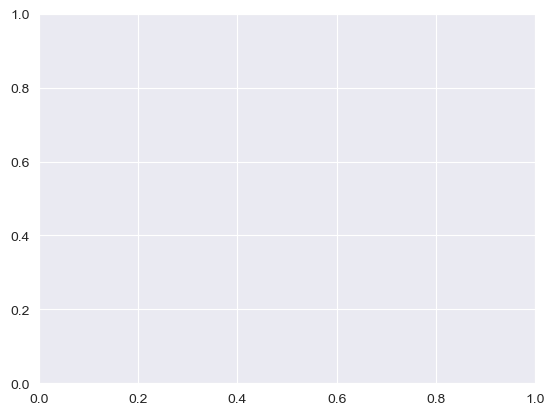

In [5]:



# Define the data for each jornada.
jornadas = [[2, 0, 0, 2, 0, 2, 0, 2, 2, 0],
            [2, 0, 2, 4, 2, 4, 0, 4, 2, 0],
            [4, 2, 2, 6, 2, 6, 2, 4, 2, 0],
            [4, 4, 2, 6, 2, 8, 2, 6, 4, 2],
            [4, 4, 4, 8, 4, 10, 2, 6, 4, 4],
            [6, 6, 4, 10, 6, 10, 2, 6, 6, 4],
            [8, 8, 6, 12, 6, 10, 4, 6, 6, 4]]

x = data['nombreEq']
# Fixing bin edges.


# Histogram our data with numpy.
data = np.array(jornadas).ravel()
n, _ = np.histogram(data, 10)
def animate(frame_number, bar_container):
    # Simulate new data coming in.
    dataAni = np.array(jornadas[frame_number]).ravel()
    n, _ = np.histogram(dataAni, 10)
    for count, rect in zip(n, bar_container.patches):
        rect.set_height(count)

    return bar_container.patches

fig, ax = plt.subplots()
_, _, bar_container = ax.hist(data, x , lw=1, ec="yellow", fc="green", alpha=0.5)
ax.set_ylim(top=55)  
# set safe limit to ensure that all data is visible.

anim = functools.partial(animate, bar_container=bar_container)
ani = animation.FuncAnimation(fig, anim, 50, repeat=False, blit=True)
plt.show()




